In [113]:
import pandas as pd

In [152]:
messages = pd.read_csv('SMSSpamCollection', sep ='\t', names = ['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [153]:
messages.shape

(5572, 2)

In [154]:
messages.isnull().sum()

label      0
message    0
dtype: int64

In [155]:
messages.label.nunique()

2

In [157]:
messages.label.unique()

array(['ham', 'spam'], dtype=object)

In [158]:
messages.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [115]:
import re
from nltk import sent_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [116]:
ps = PorterStemmer()
corpus = []

In [117]:
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ',messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(w) for w in review if w not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [118]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [119]:
#Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()

In [120]:
X.shape

(5572, 5000)

In [121]:
y = pd.get_dummies(messages['label'])
y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [122]:
y.drop('ham',axis = 1, inplace = True)

In [123]:
y.head(2)

,spam
0,0
1,0


In [124]:
y.shape,X.shape

((5572, 1), (5572, 5000))

In [125]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [126]:
y = y.spam.values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)
print(f'Shape of x_train is {x_train.shape}')
print(f'Shape of x_test is {x_test.shape}')
print(f'Shape of y_train is {y_train.shape}')
print(f'Shape of y_test is {y_test.shape}')

Shape of x_train is (4457, 5000)
Shape of x_test is (1115, 5000)
Shape of y_train is (4457,)
Shape of y_test is (1115,)


In [129]:
#Training the model using Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [130]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [131]:
y_pred = model.predict(x_test)

In [132]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score,f1_score,precision_score

In [133]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[946,   9],
       [  8, 152]], dtype=int64)

Text(69.0, 0.5, 'Actual')

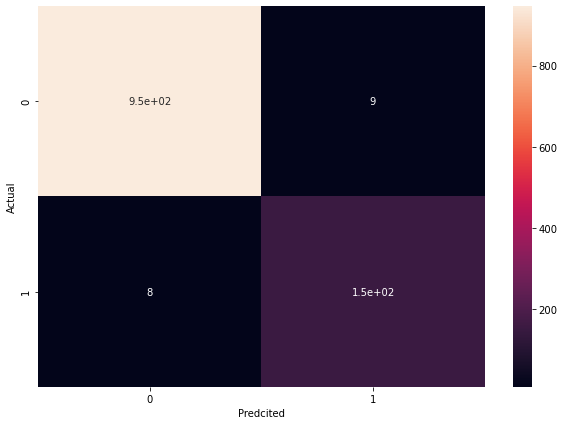

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predcited')
plt.ylabel('Actual')

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.94      0.95      0.95       160

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [138]:
model.score(x_train,y_train)

0.9923715503702042

In [137]:
model.score(x_test,y_test)

0.9847533632286996

In [149]:
values = {'Accuracy':[accuracy_score(y_test,y_pred)],
          'Recall':[recall_score(y_test,y_pred)],
          'Precision':[precision_score(y_test,y_pred)],
          
          'F1 Score':[f1_score(y_test,y_pred)]
    
}

In [160]:
df = pd.DataFrame(values, index = ['CountVectorizer'])
df

,Accuracy,Recall,Precision,F1 Score
CountVectorizer,0.984753,0.95,0.944099,0.94704


In [161]:
#TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features = 5000)
X = tf.fit_transform(corpus).toarray()

In [162]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)
print(f'Shape of x_train is {x_train.shape}')
print(f'Shape of x_test is {x_test.shape}')
print(f'Shape of y_train is {y_train.shape}')
print(f'Shape of y_test is {y_test.shape}')

Shape of x_train is (4457, 5000)
Shape of x_test is (1115, 5000)
Shape of y_train is (4457,)
Shape of y_test is (1115,)


In [163]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [164]:
y_pred = model.predict(x_test)

In [165]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[955,   0],
       [ 29, 131]], dtype=int64)

Text(33.0, 0.5, 'Actual')

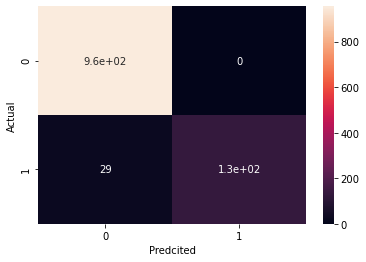

In [166]:
sns.heatmap(cm, annot = True)
plt.xlabel('Predcited')
plt.ylabel('Actual')

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       955
           1       1.00      0.82      0.90       160

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [168]:
values = {'Accuracy':[accuracy_score(y_test,y_pred)],
          'Recall':[recall_score(y_test,y_pred)],
          'Precision':[precision_score(y_test,y_pred)],
          
          'F1 Score':[f1_score(y_test,y_pred)]
    
}

In [169]:
df = pd.DataFrame(values, index = ['TfidfVectorizer'])
df

,Accuracy,Recall,Precision,F1 Score
TfidfVectorizer,0.973991,0.81875,1.0,0.900344
